In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

In [2]:
# Select color blind friendly style
plt.style.use('fivethirtyeight')


In [3]:
# load in, clean and average data
mwk_df = pd.read_csv('Milwaukee.csv')
mlps_df = pd.read_csv('Minneapolis.csv')
dlth_df = pd.read_csv('Duluth.csv')
mwk_df = mwk_df.fillna(0)
mlps_df = mlps_df.fillna(0)
dlth_df = dlth_df.fillna(0)
mwk_grouped = mwk_df.groupby(mwk_df['DATE']).mean()
mpls_grouped = mlps_df.groupby(mlps_df['DATE']).mean()
dlth_grouped = dlth_df.groupby(dlth_df['DATE']).mean()
dlth_grouped
# combine dataframes into precipitation, Snow and temperature data

# precipitation
prcp_data = pd.merge(left = mwk_grouped['PRCP'], left_on = 'DATE',
                    right = mpls_grouped['PRCP'], right_on = 'DATE')
prcp_data = pd.merge(left = prcp_data, left_on = 'DATE',
                    right = dlth_grouped['PRCP'], right_on = 'DATE')
prcp_data = prcp_data.rename(columns = {'PRCP_x':'Milwaukee','PRCP_y':'Minneapolis','PRCP':'Duluth'})

# Snow
snow_data = pd.merge(left = mwk_grouped['SNOW'], left_on = 'DATE',
                    right = mpls_grouped['SNOW'], right_on = 'DATE')
snow_data = pd.merge(left = snow_data, left_on = 'DATE',
                    right = dlth_grouped['SNOW'], right_on = 'DATE')
snow_data = snow_data.rename(columns = {'SNOW_x':'Milwaukee','SNOW_y':'Minneapolis','SNOW':'Duluth'})

# temp_max
temp_max_data = pd.merge(left = mwk_grouped['TMAX'], left_on = 'DATE',
                    right = mpls_grouped['TMAX'], right_on = 'DATE')
temp_max_data = pd.merge(left = temp_max_data, left_on = 'DATE',
                    right = dlth_grouped['TMAX'], right_on = 'DATE')
temp_max_data = temp_max_data.rename(columns = {'TMAX_x':'Milwaukee','TMAX_y':'Minneapolis','TMAX':'Duluth'})

# temp_min
temp_min_data = pd.merge(left = mwk_grouped['TMIN'], left_on = 'DATE',
                    right = mpls_grouped['TMIN'], right_on = 'DATE')
temp_min_data = pd.merge(left = temp_min_data, left_on = 'DATE',
                    right = dlth_grouped['TMIN'], right_on = 'DATE')
temp_min_data = temp_min_data.rename(columns = {'TMIN_x':'Milwaukee','TMIN_y':'Minneapolis','TMIN':'Duluth'})

prcp_data['Date']=pd.DatetimeIndex(prcp_data.index).to_period("M")
prcp_data = prcp_data.groupby(prcp_data['Date']).mean()
prcp_data['month']=prcp_data.index.to_timestamp().month
snow_data['Date']=pd.DatetimeIndex(snow_data.index).to_period("M")
snow_data = snow_data.groupby(snow_data['Date']).mean()
snow_data['month']=snow_data.index.to_timestamp().month

temp_max_data = temp_max_data[(temp_max_data != 0).all(1)]

temp_max_data['Date']=pd.DatetimeIndex(temp_max_data.index).to_period("M")
temp_max_data = temp_max_data.groupby(temp_max_data['Date']).mean()
temp_max_data['month']=temp_max_data.index.to_timestamp().month

# Interpolate clearly incorrect data
temp_max_data.loc['2010-04','Duluth']=(temp_max_data.loc['2009-04','Duluth']+
                                       temp_max_data.loc['2011-04','Duluth'])/2
temp_max_data.loc['2015-06','Duluth']=(temp_max_data.loc['2014-06','Duluth']+
                                       temp_max_data.loc['2016-06','Duluth'])/2
temp_max_data.loc['2014-09','Duluth']=(temp_max_data.loc['2013-09','Duluth']+
                                       temp_max_data.loc['2015-09','Duluth'])/2
temp_max_data.loc['2014-10','Duluth']=(temp_max_data.loc['2013-10','Duluth']+
                                       temp_max_data.loc['2015-10','Duluth'])/2

temp_min_data['Date']=pd.DatetimeIndex(temp_min_data.index).to_period("M")
temp_min_data = temp_min_data.groupby(temp_min_data['Date']).mean()
temp_min_data['month']=temp_min_data.index.to_timestamp().month

<IPython.core.display.Javascript object>


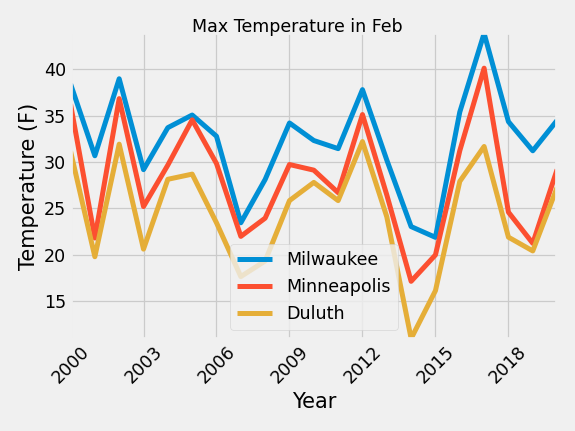

In [4]:

import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import calendar
months = pd.DataFrame(np.arange(1,13,1))
months = months[0].apply(lambda x: calendar.month_abbr[x])
x_data1 = []
y_data1 =[]

x_data2 = []
y_data2 =[]

x_data3 = []
y_data3 =[]

fig, ax = plt.subplots()
fig.set_tight_layout(True)
ax.set_xlim(2000,2020)
plt.xticks(temp_max_data[temp_max_data['month']==1].index.to_timestamp().year[::3])
plt.xticks(rotation = 45)
line1,=ax.plot(0,0)
line2, = ax.plot(0,0)
line3, = ax.plot(0,0)
ax.set_ylim(0,0.2)
plt.legend([line1,line2,line3],['Milwaukee','Minneapolis','Duluth'])
ttl = ax.text(.25, 1.005, '', transform = ax.transAxes)

def init():
    ttl.set_text('')
    return ttl
def animation_frame(i):
    x_data1=temp_max_data[temp_max_data['month']==i].index.to_timestamp().year
    y_data1=temp_max_data[temp_max_data['month']==i]['Milwaukee']
    line1.set_xdata(x_data1)
    line1.set_ydata(y_data1)
    x_data2=temp_max_data[temp_max_data['month']==i].index.to_timestamp().year
    y_data2=temp_max_data[temp_max_data['month']==i]['Minneapolis']
    line2.set_xdata(x_data2)
    line2.set_ydata(y_data2)
    x_data3=temp_max_data[temp_max_data['month']==i].index.to_timestamp().year
    y_data3=temp_max_data[temp_max_data['month']==i]['Duluth']
    line3.set_xdata(x_data3)
    line3.set_ydata(y_data3)
    y_data1 = y_data1.append(y_data2)
    
    ax.set_ylim(min(y_data1.append(y_data3)),max(y_data1.append(y_data3)))
    ax.set_xlabel('Year')
    ax.set_ylabel('Temperature (F)')
    
    ttl.set_text('Max Temperature in {}'.format(months[i-1]))
    return line1, line2, line3
animation = FuncAnimation(fig, func = animation_frame, init_func = init, frames = np.arange(1,12,1), interval = 3000)

plt.show()


In [242]:
f = r"C:\Users\ebell/animation.mp4" 
writervideo = animation.FFMpegWriter(fps=60) 
anim.save(f, writer=writervideo)

AttributeError: 'FuncAnimation' object has no attribute 'FFMpegWriter'